# Ai Project Phase-3

In this phase, we've applied an unsupervised learning algorithm (K-means clustering) to our
dataset using at least three different sizes of K. We justified our choice for the sizes of K, then we compared and discussed the results on our dataset using different evaluation methods and metrics (Silhouette coefficient, total within-cluster sum of square, BCubed precision and recall).

This Jupiter notebook include the following:

o Our code with suitable comments.
o The results of applying different sizes of K with interpreting our results.

# Unsupervised Learning: (Clustering)

Clustering is the process of grouping similar data points together. First, we prepared the data for clustering. After that, we used the k-mean approach which further selects k ojects at random and sets them as cluster centers and allocates the objects to the closest cluster center.To improve the cluster we iteratively updated the cluster center and reassigned the items to the new center. We have used the k-means() to divide our dataset to groups.


In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from collections.abc import Iterable
from sklearn.decomposition import PCA


In [2]:
# Load the dataset
df = pd.read_csv(r'train.csv')


In [3]:
# delete the outcome variable
X=df.drop('price_range', axis=1)
y=df['price_range']
X.shape

(2000, 20)

In [4]:
# data preprossing
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
# fit the dataset
mdata_scaled = scaler.fit_transform(X)
# display the shape of the data
mdata_scaled.shape


(2000, 20)

# Building and training the clustering model.

To start of our clustering model we will be setting the number of clusters as 5 as a trial and after that we will be doing measurment to decide on the number of k we should use and perform the k-means clustering model on 3 different sizes of k based on the results of this k-mean model size. 

In [5]:
# building the model with k = 5
kmeans=KMeans(n_clusters=5, max_iter=300)
kmeans.fit(mdata_scaled)

/Users/razan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

After that we will be checking the SSE (Sum of Squared Errors), which is a measure of the within-cluster sum of squared distances between each data point and the centroid of its cluster. The lower the SSE value, the better the clustering. SSE can be used to evaluate the quality of a K-means clustering solution. A low SSE value indicates that the data points are well-clustered and that the centroids are representative of the data points in their respective clusters.



In [6]:
# measuring the SSE
kmeans.inertia_

33322.62978986962

We will then be checking the Coordinates of cluster centers.

In [7]:
# cluster values
kmeans.cluster_centers_

array([[-3.93348508e-02, -1.62798838e-03, -1.75152615e-01,
        -1.00413475e-01, -3.98817685e-01,  3.35217028e-01,
         8.54095713e-02,  5.64370599e-02,  2.89412984e-02,
         1.77270745e-02, -3.31451424e-01,  1.25738955e+00,
         1.00895612e+00,  9.13734529e-03,  2.86794859e-01,
         1.74307472e-01, -1.33989621e-01,  5.11892052e-01,
         8.70248223e-02,  1.77877898e-01],
       [-3.37807452e-02,  6.47078307e-02,  5.18526757e-02,
         3.13338838e-02, -6.92908851e-02, -1.04396559e+00,
         1.61328273e-02,  2.95982596e-02,  1.12572358e-03,
         2.69128856e-02, -2.66504951e-02,  8.96956901e-03,
        -3.06513060e-02, -4.77712026e-02, -3.32838686e-02,
        -5.90436201e-02,  9.21217377e-02, -1.78686097e+00,
        -3.00705632e-02, -1.18129739e-02],
       [ 9.89378193e-02, -5.05212581e-02,  7.87022764e-02,
        -6.22389008e-02,  1.51888782e+00,  2.36757889e-01,
        -1.54430061e-01, -3.50531603e-02,  1.19993805e-01,
        -1.84123128e-02,  1.1

We will also check the number of iterations that has been run.

In [8]:
#Showing number of runs
kmeans.n_iter_

13

To make sure that all features has been seen during the fit, we will be using the below code.

In [9]:
# Checking number of features
kmeans.n_features_in_

20

Labels of each point.

In [10]:
# Checking number of labels
cluster_labels=kmeans.labels_
cluster_labels

array([1, 0, 0, ..., 4, 3, 3], dtype=int32)

We will then be measuring the Silhouette score which is a measure of how well each data point is clustered. It is calculated as the ratio between the average intra-cluster distance and the average nearest-cluster distance for each data point. The higher the silhouette score, the better the clustering. Additionally, Silhouette score can be used to evaluate the quality of a clustering solution. A high silhouette score indicates that the data points are well-clustered and that the clusters are well-separated.


In [11]:
# Checking silhouette score
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels )
print("The silhouette score is: {0}".format(silhoutte_avg))

The silhouette score is: 0.0536988731659265


We will then be finding the Optimal Silhouette score and SSE.

In [12]:
# optimizing the clusters 
sse=[]
s_score=[]
max_k=5
for num_custer in range(2,max_k):
  model=KMeans(n_clusters=num_custer, max_iter=60)
  model.fit(mdata_scaled)
  # SSE:Store inertia value
  sse.append(model.inertia_)
  #silhouette_score
  sc=silhouette_score(mdata_scaled, model.labels_, sample_size=1000)
  s_score.append(sc)

/Users/razan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/razan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/razan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We will then be visualizing the SSE based on the number of clusters and find the optimal solution.

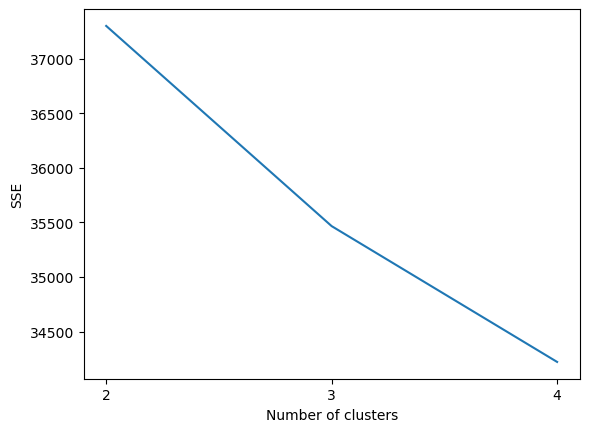

In [13]:
# plotting of silhouette score
plt.plot(range(2,max_k), sse )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

The output of this above code demonstrates the optimal number of clusters is likely to be k=2 and will be confirmed after applying the model.

In [14]:
# Displaying the silhouette scores for each cluster
s_score

[0.06730209544359672, 0.06494630228342407, 0.0608934318033105]

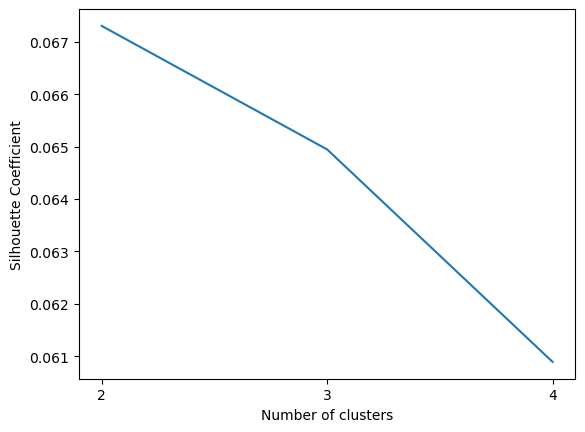

In [15]:
#Silhouette Coefficient plot:
#Analysing silhouette score on plot
plt.plot(range(2,max_k), s_score )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

After performing the above calculation we will be using it's results to choose the sizes of k, We can see that a higher Solihouette score and SSE value are found in the 2,3,4 k-means cluster sizes. based on this observation, we will be choosing them as our clustering k-means sizes.

# K=2


In [16]:
# building the model with k = 2
kmeans1=KMeans(n_clusters=2, max_iter=300)
kmeans1.fit(mdata_scaled)


/Users/razan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [17]:
# measuring the SSE for k=2
kmeans1.inertia_

37298.947007751834

In [18]:
# measuring the cluster centers values for k =2
kmeans1.cluster_centers_

array([[-0.01635326, -0.01403414,  0.0449671 , -0.00332662,  0.01728774,
        -1.04396559, -0.00907203,  0.00190346,  0.01726378,  0.03101152,
         0.00584435,  0.02008197, -0.00777568, -0.00763502, -0.02835986,
        -0.03863192,  0.04867783, -0.60993227, -0.01749457,  0.0183947 ],
       [ 0.01500486,  0.01287696, -0.04125936,  0.00305232, -0.01586229,
         0.95788598,  0.008324  , -0.00174651, -0.01584031, -0.02845448,
        -0.00536246, -0.01842612,  0.00713454,  0.00700547,  0.02602146,
         0.03544654, -0.04466413,  0.55964063,  0.01605206, -0.01687797]])

In [19]:
# measuring the number of iteration thay has been run for k = 2
kmeans1.n_iter_


15

In [20]:
# measuring the number of features used for k = 2
kmeans1.n_features_in_

20

In [21]:
# Checking number of labels
cluster_labels1=kmeans1.labels_
cluster_labels1

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [22]:
# Checking silhouette score
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels1 )
print("The silhouette score is for k =2 : {0}".format(silhoutte_avg))

The silhouette score is for k =2 : 0.06771623890102013


In [23]:
#Add a new column named KMeans-2Clusters to the dataset that has the current label of the value.
df['KMeans-2Clusters'] = kmeans1.labels_

#Printing the dataset with the new column.
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans-2Clusters
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,1
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,1


In [24]:
#Caluculate the total number of correctly labeled points.
correctly_labeled = sum(kmeans.labels_ == kmeans1.labels_)
print("Number of correctly labelled points:", correctly_labeled, " points \n" )


Number of correctly labelled points: 107  points 



# Evalution:

In [25]:
#Importing the methods
from sklearn.metrics import silhouette_score

print('Evaluation of 2 clusters: \n')

#Printing the cluster centers
print('Cluster centers: \n',kmeans1.cluster_centers_, '\n')

#Printing the total within-cluster sum of squared error.
print('Intra-cluster variance(total within-cluster sum of squared error) \n', kmeans1.inertia_, '\n')

# Printing silhouette score
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels1 )
print("The silhouette score is for k =2 : {0}".format(silhoutte_avg))

Evaluation of 2 clusters: 

Cluster centers: 
 [[-0.01635326 -0.01403414  0.0449671  -0.00332662  0.01728774 -1.04396559
  -0.00907203  0.00190346  0.01726378  0.03101152  0.00584435  0.02008197
  -0.00777568 -0.00763502 -0.02835986 -0.03863192  0.04867783 -0.60993227
  -0.01749457  0.0183947 ]
 [ 0.01500486  0.01287696 -0.04125936  0.00305232 -0.01586229  0.95788598
   0.008324   -0.00174651 -0.01584031 -0.02845448 -0.00536246 -0.01842612
   0.00713454  0.00700547  0.02602146  0.03544654 -0.04466413  0.55964063
   0.01605206 -0.01687797]] 

Intra-cluster variance(total within-cluster sum of squared error) 
 37298.947007751834 

The silhouette score is for k =2 : 0.06771623890102013


# k=3 

In [26]:
# building the model with k = 3
kmeans2=KMeans(n_clusters=3, max_iter=300)
kmeans2.fit(mdata_scaled)


/Users/razan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
# measuring the SSE for k=3
kmeans2.inertia_ 

35466.76657720351

In [28]:
# measuring the cluster centers values for k = 3
kmeans2.cluster_centers_

array([[ 9.08020213e-02, -2.97471154e-02,  2.34780753e-03,
        -1.16000272e-01,  8.82508860e-01,  2.89541255e-01,
        -1.39626351e-01, -3.63942328e-02,  5.30698883e-02,
        -6.07459085e-02,  9.31564484e-01, -6.73166014e-02,
        -6.87242360e-02,  8.44316663e-02, -2.29436584e-02,
        -6.00221436e-03,  2.88364110e-02,  5.59640631e-01,
         5.91838952e-02,  3.08456303e-04],
       [-5.29012871e-02, -7.89748661e-03, -4.59212057e-02,
         6.82606443e-02, -6.19206044e-01,  3.53299931e-01,
         8.93087908e-02,  1.41031641e-02, -3.58605652e-02,
         2.86935545e-02, -6.56689620e-01,  1.76417735e-02,
         4.86866286e-02, -4.43456092e-02,  2.76147916e-02,
         3.37221233e-02, -6.09871342e-02,  5.59640631e-01,
        -2.83718754e-02,  3.89747369e-03],
       [-2.05885131e-02,  5.40278587e-02,  8.29702032e-02,
         2.50296755e-02, -3.20308023e-03, -1.04396559e+00,
         1.67356730e-02,  2.15592111e-02, -2.77068032e-03,
         2.63252384e-02,  2.3

In [29]:
# measuring the number of iteration thay has been run for k = 3
kmeans2.n_iter_

16

In [30]:
# measuring the number of features used for k = 3
kmeans2.n_features_in_

20

In [31]:
# Checking number of labels
cluster_labels2=kmeans2.labels_
cluster_labels2

array([2, 1, 1, ..., 1, 1, 0], dtype=int32)

In [32]:
# Checking silhouette score for k = 3
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels2 )
print("The silhouette score is for k = 3 : {0}".format(silhoutte_avg))

The silhouette score is for k = 3 : 0.06556787188690322


In [33]:
# building the model with k = 4
kmeans3=KMeans(n_clusters=4, max_iter=300)
kmeans3.fit(mdata_scaled)

/Users/razan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [34]:
#Add a new column named KMeans-2Clusters to X dataset that has the current label of the value.
df['KMeans-3Clusters'] = kmeans2.labels_

#Printing the X dataset with the new column.
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans-2Clusters,KMeans-3Clusters
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,0,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,1,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,0,1,1
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,2,0,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,3,1,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,0,1,1


In [35]:
#Caluculate the total number of correctly labeled points.
correctly_labeled = sum(kmeans.labels_ == kmeans2.labels_)
print("Number of correctly labelled points:", correctly_labeled, " points \n" )


Number of correctly labelled points: 89  points 



# Evalution:

In [36]:
#Importing the methods
from sklearn.metrics import silhouette_score

print('Evaluation of 3 clusters: \n')

#Printing the cluster centers
print('Cluster centers: \n',kmeans2.cluster_centers_, '\n')

#Printing the total within-cluster sum of squared error.
print('Intra-cluster variance(total within-cluster sum of squared error.): \n', kmeans2.inertia_, '\n')

# Printing silhouette score
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels2 )
print("The silhouette score is for k = 3 : {0}".format(silhoutte_avg))

Evaluation of 3 clusters: 

Cluster centers: 
 [[ 9.08020213e-02 -2.97471154e-02  2.34780753e-03 -1.16000272e-01
   8.82508860e-01  2.89541255e-01 -1.39626351e-01 -3.63942328e-02
   5.30698883e-02 -6.07459085e-02  9.31564484e-01 -6.73166014e-02
  -6.87242360e-02  8.44316663e-02 -2.29436584e-02 -6.00221436e-03
   2.88364110e-02  5.59640631e-01  5.91838952e-02  3.08456303e-04]
 [-5.29012871e-02 -7.89748661e-03 -4.59212057e-02  6.82606443e-02
  -6.19206044e-01  3.53299931e-01  8.93087908e-02  1.41031641e-02
  -3.58605652e-02  2.86935545e-02 -6.56689620e-01  1.76417735e-02
   4.86866286e-02 -4.43456092e-02  2.76147916e-02  3.37221233e-02
  -6.09871342e-02  5.59640631e-01 -2.83718754e-02  3.89747369e-03]
 [-2.05885131e-02  5.40278587e-02  8.29702032e-02  2.50296755e-02
  -3.20308023e-03 -1.04396559e+00  1.67356730e-02  2.15592111e-02
  -2.77068032e-03  2.63252384e-02  2.36155130e-03  5.57031379e-02
  -6.25369983e-04 -2.82233615e-02 -2.15011793e-02 -5.52876005e-02
   7.62775587e-02 -1.786860

# k=4


In [37]:
# measuring the SSE for k=4
kmeans3.inertia_

34222.67147878874

In [38]:
# measuring the cluster centers values for k = 4
kmeans3.cluster_centers_

array([[-2.58619892e-02,  5.88352136e-02,  7.00606857e-02,
         2.13435556e-02, -3.16852826e-02, -1.04396559e+00,
         2.66953758e-02,  2.78017577e-02, -8.11557040e-03,
         2.77030110e-02, -1.38926331e-02,  4.76011073e-02,
        -6.87811814e-03, -3.04951075e-02, -2.84088414e-02,
        -6.34981766e-02,  7.57202212e-02, -1.78686097e+00,
        -2.93550932e-02, -1.18780219e-02],
       [ 7.81435636e-02, -2.17471191e-02,  1.35858432e-02,
         8.89525653e-02, -5.43435867e-01,  2.87424577e-01,
         7.82841484e-02, -4.13005071e-02, -7.39529392e-02,
        -8.04419639e-02, -4.89950007e-01, -5.04214619e-01,
        -4.67838150e-01, -5.88152561e-02, -3.73856209e-01,
        -3.37923697e-01, -5.79119542e-03,  5.59640631e-01,
        -4.40960318e-02, -1.50522688e-01],
       [ 3.96216290e-02,  3.34828272e-03,  7.38334847e-02,
        -7.00104207e-02,  1.24159057e+00,  2.78765599e-01,
        -1.99344541e-01,  8.26650346e-05,  9.15780886e-02,
        -5.79178235e-02,  1.0

In [39]:
# measuring the number of iteration thay has been run for k = 4
kmeans3.n_iter_

56

In [40]:
# measuring the number of features used for k = 4
kmeans3.n_features_in_

20

In [41]:
# Checking number of labels
cluster_labels3=kmeans3.labels_
cluster_labels3

array([0, 3, 3, ..., 1, 1, 2], dtype=int32)

In [42]:
# Checking silhouette score for k = 4
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels3 )
print("The silhouette score is for k = 4 : {0}".format(silhoutte_avg))

The silhouette score is for k = 4 : 0.05828303342769908


In [43]:
#Add a new column named KMeans-2Clusters to X dataset that has the current label of the value.
df['KMeans-4Clusters'] = kmeans3.labels_

#Printing the X dataset with the new column.
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans-2Clusters,KMeans-3Clusters,KMeans-4Clusters
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7,19,0,0,1,1,0,2,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3,7,1,1,0,2,1,1,3
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2,9,1,1,0,2,1,1,3
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8,11,1,0,0,2,0,1,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2,15,1,1,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,13,4,19,1,1,0,0,1,1,3
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,11,10,16,1,1,1,2,0,1,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,9,1,5,1,1,0,3,1,1,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,18,10,19,1,1,1,0,1,1,1


In [44]:
#Caluculate the total number of correctly labeled points.
correctly_labeled = sum(kmeans.labels_ == kmeans3.labels_)
print("Number of correctly labelled points:", correctly_labeled, " points \n" )


Number of correctly labelled points: 470  points 



# Evalution:

In [45]:
#Importing the methods
from sklearn.metrics import silhouette_score

print('Evaluation of 4 clusters: \n')

#Printing the cluster centers
print('Cluster centers: \n',kmeans3.cluster_centers_, '\n')

#Printing the total within-cluster sum of squared error.
print('Intra-cluster variance: \n', kmeans3.inertia_, '\n')

# Printing silhouette score
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels3 )
print("The silhouette score is for k = 4 : {0}".format(silhoutte_avg))

Evaluation of 4 clusters: 

Cluster centers: 
 [[-2.58619892e-02  5.88352136e-02  7.00606857e-02  2.13435556e-02
  -3.16852826e-02 -1.04396559e+00  2.66953758e-02  2.78017577e-02
  -8.11557040e-03  2.77030110e-02 -1.38926331e-02  4.76011073e-02
  -6.87811814e-03 -3.04951075e-02 -2.84088414e-02 -6.34981766e-02
   7.57202212e-02 -1.78686097e+00 -2.93550932e-02 -1.18780219e-02]
 [ 7.81435636e-02 -2.17471191e-02  1.35858432e-02  8.89525653e-02
  -5.43435867e-01  2.87424577e-01  7.82841484e-02 -4.13005071e-02
  -7.39529392e-02 -8.04419639e-02 -4.89950007e-01 -5.04214619e-01
  -4.67838150e-01 -5.88152561e-02 -3.73856209e-01 -3.37923697e-01
  -5.79119542e-03  5.59640631e-01 -4.40960318e-02 -1.50522688e-01]
 [ 3.96216290e-02  3.34828272e-03  7.38334847e-02 -7.00104207e-02
   1.24159057e+00  2.78765599e-01 -1.99344541e-01  8.26650346e-05
   9.15780886e-02 -5.79178235e-02  1.03632940e+00 -1.24399386e-01
  -1.12244726e-01  7.84166376e-02 -1.80194394e-02 -4.47586943e-02
   4.79126786e-02  5.336262

## Elbow method

In cluster analysis, the elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters.

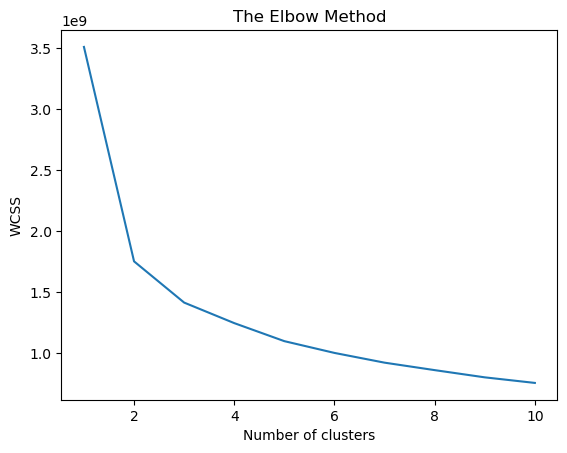

In [46]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
 kmeans.fit(X) 
 wcss.append(kmeans.inertia_)
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Comparison:
For compariso between clusters we will use (Silhoutte scor ,total within-cluster sum of square,SEE )

- Silhouette Coefficient:
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

- The within-cluster sum of squares:
is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares.


- SSE (Sum of Squared Errors):
which is a measure of the within-cluster sum of squared distances between each data point and the centroid of its cluster. The lower the SSE value, the better the clustering. SSE can be used to evaluate the quality of a K-means clustering solution. A low SSE value indicates that the data points are well-clustered and that the centroids are representative of the data points in their respective clusters.



## K=2 
Silhoutte score= 0.06771623890102013

total within-cluster sum of square:
We compared using Wcss Curve, find the Pic in the github main (k=2)
SEE: 
 37298.947007751834 

Is it the optimal number? 
Yes



## K=3

Silhoutte score= 0.0656243795505872

Total within-cluster sum of square: We compared using Wcss Curve, find the Pic in the github main (k=3)

SSE = 35466.75921695311
 
Is it the optimal number? 
NO

# K=4
Silhoutte score= 0.05873442144598794

Total within-cluster sum of square:
We compared using Wcss Curve, find the Pic in the github main (k=4)


SSE= 34223.15291630755

Is it the optimal number? 
NO


# - Attempt to find precision and recall but it doesn't work correctly 
Extract the features from the datase
X = kmeans.n_features_in_

Extract the true cluster labels from the dataset
y_true = kmeans.labels_
#cluster_labels=kmeans.labels_

Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

Extract the predicted cluster labels from the KMeans object
y_pred = kmeans3.labels_


- Calculate BCubed precision
precision = precision_score(y_true, y_pred, average='micro')
print('BCubed precision for (K = 2):', precision)



Extract the features from the dataset
X = kmeans.n_features_in_

Extract the true cluster labels from the dataset
y_true = kmeans.labels_

Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

Extract the predicted cluster labels from the KMeans object
y_pred = kmeans3.labels_

Calculate BCubed recall
labels = np.unique(y_true)
recall = 0
for label in labels:
    idx = np.where(y_true == label)[0]
    recall += np.sum(y_true[idx] == y_pred[idx]) / len(idx)
recall /= len(labels)
print('BCubed recall for (K = 2):', recall)